# Classify Image As Cat or Dog

## Problem Definition

Utilize Convolutional Neural Networks to train a model for classifying images as either containing a cat or a dog. Once trained, evaluate the model's performance by passing it new images of cats and dogs to predict categories for unseen data.

This represents a supervised binary classification problem.

## Imports

In [1]:
%%capture
# Install pillow
!pip install -U pillow

In [2]:
import os
import pickle

from PIL import Image

import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split

## Mount Drive

In [3]:
from google.colab import drive

# Mount your Google Drive (replace '/content/drive' with your desired mount point if different)
drive.mount('/content/drive')

Mounted at /content/drive


## Read Pickle Files

In [4]:
base_dir = '/content/drive/MyDrive/Data-Science-BootCamp/Module_6_Deep_Learning/Projects/Instructions/Project.6-Images/Images'
X_file = f"{base_dir}/X.pickle"
y_file = f"{base_dir}/y.pickle"

In [5]:
with open(X_file, "rb") as f:
  X = pickle.load(f)

In [6]:
type(X)

numpy.ndarray

In [7]:
X.shape

(24946, 100, 100, 1)

In [8]:
with open(y_file, "rb") as f:
  y = pickle.load(f)

In [9]:
type(y)

list

In [10]:
y = np.asarray(y)
type(y)

numpy.ndarray

In [11]:
y.shape

(24946,)

## Data Cleaning

In [12]:
X[0]

array([[[ 95],
        [ 94],
        [ 98],
        ...,
        [170],
        [172],
        [171]],

       [[ 92],
        [ 91],
        [ 95],
        ...,
        [170],
        [172],
        [171]],

       [[ 89],
        [ 91],
        [ 92],
        ...,
        [165],
        [169],
        [169]],

       ...,

       [[ 84],
        [ 76],
        [ 73],
        ...,
        [135],
        [164],
        [154]],

       [[ 82],
        [ 79],
        [ 71],
        ...,
        [142],
        [134],
        [153]],

       [[ 80],
        [ 85],
        [ 85],
        ...,
        [151],
        [146],
        [138]]], dtype=uint8)

In [13]:
X_scaled = X / 255.0

In [14]:
X_scaled.shape

(24946, 100, 100, 1)

In [15]:
X_scaled[0]

array([[[0.37254902],
        [0.36862745],
        [0.38431373],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.36078431],
        [0.35686275],
        [0.37254902],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.34901961],
        [0.35686275],
        [0.36078431],
        ...,
        [0.64705882],
        [0.6627451 ],
        [0.6627451 ]],

       ...,

       [[0.32941176],
        [0.29803922],
        [0.28627451],
        ...,
        [0.52941176],
        [0.64313725],
        [0.60392157]],

       [[0.32156863],
        [0.30980392],
        [0.27843137],
        ...,
        [0.55686275],
        [0.5254902 ],
        [0.6       ]],

       [[0.31372549],
        [0.33333333],
        [0.33333333],
        ...,
        [0.59215686],
        [0.57254902],
        [0.54117647]]])

## Data Exploration

In [16]:
X_scaled.shape

(24946, 100, 100, 1)

In [17]:
y.shape

(24946,)

In [18]:
def show_image_at_idx(image_idx):
  image = X_scaled[image_idx]
  plt.imshow(image[:, :, 0], cmap="gray")
  plt.title(f"Image {image_idx+1}")
  plt.show()
  print(f"Response value in y for Image {image_idx+1}:", y[image_idx])

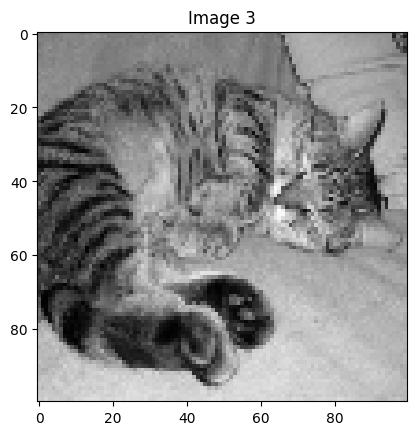

Response value in y for Image 3: 1


In [19]:
show_image_at_idx(2)

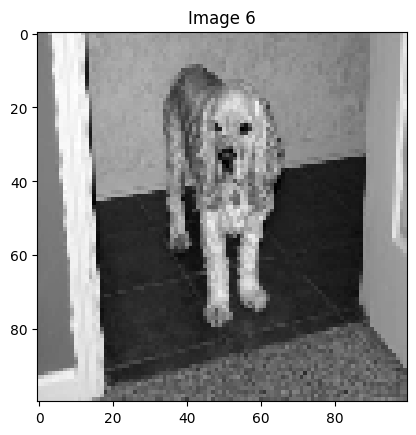

Response value in y for Image 6: 0


In [20]:
show_image_at_idx(5)

## Create Train & Test Sets

In [21]:
test_size = 0.2
random_state = 42

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)

In [23]:
X_train.shape

(19956, 100, 100, 1)

In [24]:
X_test.shape

(4990, 100, 100, 1)

In [25]:
y_train.shape

(19956,)

In [26]:
y_test.shape

(4990,)

In [27]:
X_train[0]

array([[[0.20392157],
        [0.25098039],
        [0.21176471],
        ...,
        [0.50196078],
        [0.59607843],
        [0.58431373]],

       [[0.21568627],
        [0.29803922],
        [0.25490196],
        ...,
        [0.56470588],
        [0.62352941],
        [0.57647059]],

       [[0.20392157],
        [0.21568627],
        [0.23137255],
        ...,
        [0.26666667],
        [0.31372549],
        [0.30980392]],

       ...,

       [[0.52941176],
        [0.61176471],
        [0.60784314],
        ...,
        [0.58039216],
        [0.57254902],
        [0.54901961]],

       [[0.55686275],
        [0.57647059],
        [0.5372549 ],
        ...,
        [0.55686275],
        [0.6       ],
        [0.61960784]],

       [[0.62352941],
        [0.6       ],
        [0.58823529],
        ...,
        [0.46666667],
        [0.58823529],
        [0.64705882]]])

In [28]:
X_test[0]

array([[[0.43137255],
        [0.43529412],
        [0.42352941],
        ...,
        [0.31764706],
        [0.30588235],
        [0.29019608]],

       [[0.40392157],
        [0.41176471],
        [0.41568627],
        ...,
        [0.34901961],
        [0.32156863],
        [0.30980392]],

       [[0.43921569],
        [0.43921569],
        [0.43921569],
        ...,
        [0.40784314],
        [0.36470588],
        [0.34901961]],

       ...,

       [[0.30980392],
        [0.29803922],
        [0.3254902 ],
        ...,
        [0.11764706],
        [0.14901961],
        [0.14509804]],

       [[0.34509804],
        [0.34901961],
        [0.34117647],
        ...,
        [0.13333333],
        [0.14117647],
        [0.1372549 ]],

       [[0.38039216],
        [0.37254902],
        [0.36078431],
        ...,
        [0.09803922],
        [0.16078431],
        [0.15686275]]])

## Build Model 1 (binary_crossentropy loss function)

In [29]:
model1 = Sequential()

### Create Layers

In [30]:
# Define input layer & first hidden layer
model1.add(
  Conv2D(
    name = "input",
    input_shape = (100, 100, 1),
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

In [31]:
model1.add(
  MaxPooling2D(pool_size=(2,2))
)

In [32]:
# Define second hidden layer
model1.add(
  Conv2D(
    name = "hidden1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

In [33]:
model1.add(
  MaxPooling2D(pool_size=(2,2))
)

In [34]:
# Flatten data to be used in output layer
model1.add(
    Flatten()
)

In [35]:
# Define output layer
model1.add(
  Dense(
    name = "Output",
    units = 1,
    activation = 'sigmoid',
  )
)

### Compile Model

In [36]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit Model (8 epochs)

In [37]:
model1.fit(X_train, y_train, epochs=8)

Epoch 1/8
624/624 [==============================] - 13s 13ms/step - loss: 0.5963 - accuracy: 0.6680
Epoch 2/8
624/624 [==============================] - 8s 12ms/step - loss: 0.4959 - accuracy: 0.7596
Epoch 3/8
624/624 [==============================] - 8s 13ms/step - loss: 0.4437 - accuracy: 0.7935
Epoch 4/8
624/624 [==============================] - 8s 12ms/step - loss: 0.4082 - accuracy: 0.8164
Epoch 5/8
624/624 [==============================] - 8s 13ms/step - loss: 0.3702 - accuracy: 0.8354
Epoch 6/8
624/624 [==============================] - 8s 12ms/step - loss: 0.3307 - accuracy: 0.8558
Epoch 7/8
624/624 [==============================] - 8s 12ms/step - loss: 0.3024 - accuracy: 0.8710
Epoch 8/8
624/624 [==============================] - 8s 13ms/step - loss: 0.2702 - accuracy: 0.8865


In [38]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 hidden1 (Conv2D)            (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 Output (Dense)              (None, 1)                 3

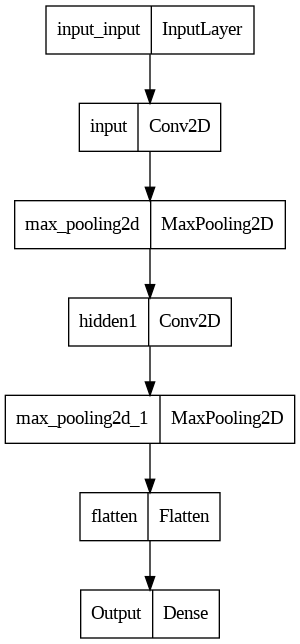

In [39]:
plot_model(model1)

### Evaluate Model

In [40]:
val_loss, val_acc = model1.evaluate(X_test, y_test)
val_acc

156/156 [==============================] - 1s 6ms/step - loss: 0.4757 - accuracy: 0.7966


0.796593189239502

### Use Model For Predictions

In [41]:
predictions_1 = model1.predict(X_test)

156/156 [==============================] - 1s 4ms/step


In [42]:
predictions_1.shape

(4990, 1)

In [43]:
filter = ( predictions_1 > 0.5 )

In [44]:
class_pred = filter.astype("int32")

In [45]:
results_for_model_1 = pd.DataFrame( {
  "Truth": y_test,
  "Prediction": predictions_1[:,0],
  "Class": class_pred[:,0],
} )

In [46]:
results_for_model_1.head()

,Truth,Prediction,Class
0,0,0.307837,0
1,1,0.555761,1
2,1,0.990468,1
3,1,0.914861,1
4,0,0.050857,0


Pick any index from 0 to 4989

In [47]:
def show_prediction_1(idx):
  print(results_for_model_1.iloc[idx])
  plt.imshow(X_test[idx], cmap="gray")
  plt.title(f"Image {idx+1}")
  plt.show()

Truth         1.00000
Prediction    0.82728
Class         1.00000
Name: 1000, dtype: float64


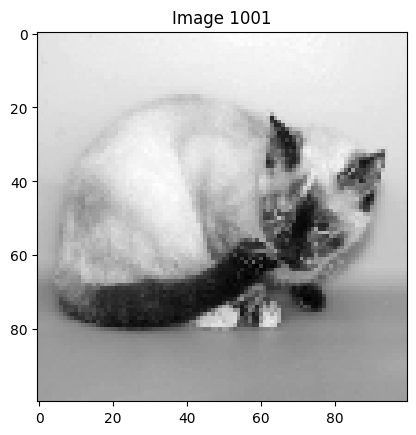

In [48]:
show_prediction_1(1000)

Truth         0.000000
Prediction    0.000138
Class         0.000000
Name: 3000, dtype: float64


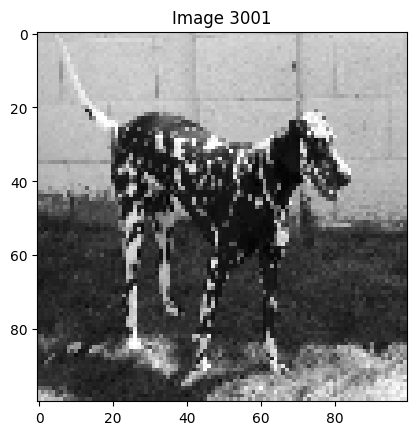

In [49]:
show_prediction_1(3000)

### Mismatches

In [50]:
results_for_model_1.query("Truth != Class").head()

,Truth,Prediction,Class
16,0,0.661283,1
18,1,0.454269,0
22,0,0.700995,1
29,1,0.083606,0
33,1,0.036147,0


In [51]:
filter_mismatch = ( results_for_model_1["Truth"] != results_for_model_1["Class"] )
filter_mismatch.sum()

1015

## Build Model 2 (poisson loss function)

In [52]:
model2 = Sequential()

### Create Layer

In [53]:
# Define input layer & first hidden layer
model2.add(
  Conv2D(
    name = "input",
    input_shape = (100, 100, 1),
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

In [54]:
model2.add(
  MaxPooling2D(pool_size=(2,2))
)

In [55]:
# Define second hidden layer
model2.add(
  Conv2D(
    name = "hidden1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

In [56]:
model2.add(
  MaxPooling2D(pool_size=(2,2))
)

In [57]:
# Flatten data to be used in output layer
model2.add(
    Flatten()
)

In [58]:
# Define output layer
model2.add(
  Dense(
    name = "Output",
    units = 1,
    activation = 'sigmoid',
  )
)

### Compile Model

In [59]:
model2.compile(optimizer='adam', loss='poisson', metrics=['accuracy'])

### Fit Model (8 epochs)

In [60]:
model2.fit(X_train, y_train, epochs=8)

Epoch 1/8
624/624 [==============================] - 9s 13ms/step - loss: 0.8069 - accuracy: 0.6464
Epoch 2/8
624/624 [==============================] - 7s 12ms/step - loss: 0.7593 - accuracy: 0.7371
Epoch 3/8
624/624 [==============================] - 8s 13ms/step - loss: 0.7376 - accuracy: 0.7665
Epoch 4/8
624/624 [==============================] - 8s 13ms/step - loss: 0.7197 - accuracy: 0.7878
Epoch 5/8
624/624 [==============================] - 8s 12ms/step - loss: 0.7019 - accuracy: 0.8079
Epoch 6/8
624/624 [==============================] - 8s 13ms/step - loss: 0.6850 - accuracy: 0.8232
Epoch 7/8
624/624 [==============================] - 7s 12ms/step - loss: 0.6665 - accuracy: 0.8445
Epoch 8/8
624/624 [==============================] - 8s 13ms/step - loss: 0.6512 - accuracy: 0.8557


In [61]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 hidden1 (Conv2D)            (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 Output (Dense)              (None, 1)                

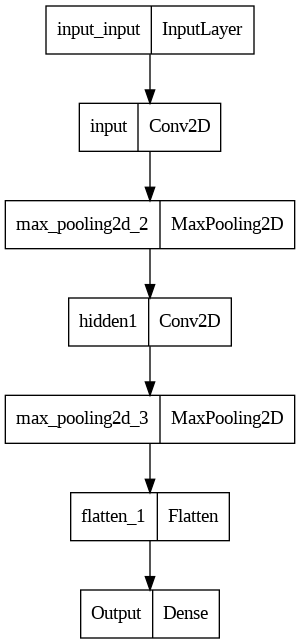

In [62]:
plot_model(model2)

### Evaluate Model

In [63]:
val_loss, val_acc = model2.evaluate(X_test, y_test)
val_acc

156/156 [==============================] - 1s 5ms/step - loss: 0.7869 - accuracy: 0.7836


0.7835671305656433

### Use Model For Predictions

In [64]:
predictions_2 = model2.predict(X_test)

156/156 [==============================] - 1s 3ms/step


In [65]:
predictions_2.shape

(4990, 1)

In [66]:
filter = ( predictions_2 > 0.5 )

In [67]:
class_pred = filter.astype("int32")

In [68]:
results_for_model_2 = pd.DataFrame( {
  "Truth": y_test,
  "Prediction": predictions_1[:,0],
  "Class": class_pred[:,0],
} )

In [69]:
results_for_model_1.head()

,Truth,Prediction,Class
0,0,0.307837,0
1,1,0.555761,1
2,1,0.990468,1
3,1,0.914861,1
4,0,0.050857,0


In [70]:
def show_prediction_2(idx):
  print(results_for_model_2.iloc[idx])
  plt.imshow(X_test[idx], cmap="gray")
  plt.title(f"Image {idx+1}")
  plt.show()

Truth         1.00000
Prediction    0.82728
Class         1.00000
Name: 1000, dtype: float64


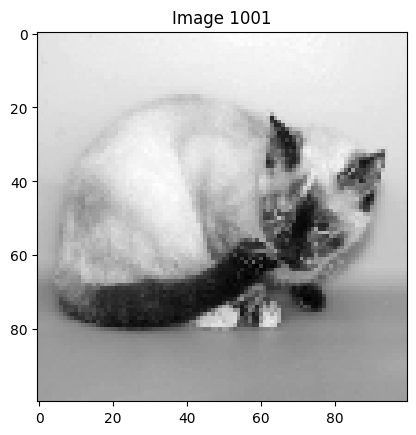

In [71]:
show_prediction_1(1000)

Truth         0.000000
Prediction    0.000138
Class         0.000000
Name: 3000, dtype: float64


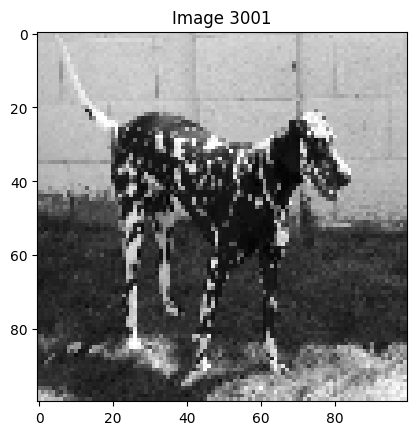

In [72]:
show_prediction_1(3000)

### Mismatches

In [73]:
results_for_model_2.query("Truth != Class").head()

,Truth,Prediction,Class
3,1,0.914861,0
16,0,0.661283,1
18,1,0.454269,0
19,1,0.743918,0
22,0,0.700995,1


In [74]:
filter_mismatch = ( results_for_model_2["Truth"] != results_for_model_2["Class"] )
filter_mismatch.sum()

1080

## Test External Imgages

In [75]:
def predict_test_images(image_path_array):
  for path in image_path_array:
    img=Image.open(path)
    img_resized = img.resize((100, 100))
    display(img_resized)
    img_gray = img_resized.convert('L')
    image_as_np_array = asarray(img_gray)
    img_array = image_as_np_array / 255.0 # Scale values
    img_array = img_array.reshape((1, 100, 100, 1))
    predictions = model1.predict(img_array);
    print(f"Model 1 with binary_crossentropy loss function predicts: {predictions[0,0]} so its a {'cat' if (predictions[0,0] > 0.5) else 'dog'}")
    predictions = model2.predict(img_array);
    print(f"Model 2 with Poisson loss function predicts: {predictions[0,0]} so its a {'cat' if (predictions[0,0] > 0.5) else 'dog'}")
    print("\n\n\n")


In [76]:
test_dog_file = f"{base_dir}/dog_1.png"
test_hotdog_file = f"{base_dir}/hotdog.png"
test_cat1_file = f"{base_dir}/cat_1.png"
test_cat2_file = f"{base_dir}/cat_2.png"
test_cat3_file = f"{base_dir}/cat_3.png"
test_cat4_file = f"{base_dir}/cat_4.png"

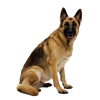

1/1 [==============================] - 0s 136ms/step
Model 1 with binary_crossentropy loss function predicts: 0.0012934333644807339 so its a dog
1/1 [==============================] - 0s 17ms/step
Model 2 with Poisson loss function predicts: 0.0019715239759534597 so its a dog






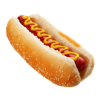

1/1 [==============================] - 0s 17ms/step
Model 1 with binary_crossentropy loss function predicts: 3.4000377127085812e-06 so its a dog
1/1 [==============================] - 0s 16ms/step
Model 2 with Poisson loss function predicts: 0.00010382946493336931 so its a dog






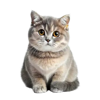

1/1 [==============================] - 0s 17ms/step
Model 1 with binary_crossentropy loss function predicts: 0.05631475895643234 so its a dog
1/1 [==============================] - 0s 16ms/step
Model 2 with Poisson loss function predicts: 0.012851612642407417 so its a dog






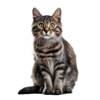

1/1 [==============================] - 0s 17ms/step
Model 1 with binary_crossentropy loss function predicts: 0.001741573098115623 so its a dog
1/1 [==============================] - 0s 16ms/step
Model 2 with Poisson loss function predicts: 0.027631303295493126 so its a dog






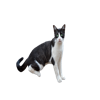

1/1 [==============================] - 0s 18ms/step
Model 1 with binary_crossentropy loss function predicts: 0.00197753612883389 so its a dog
1/1 [==============================] - 0s 16ms/step
Model 2 with Poisson loss function predicts: 0.00010947474947897717 so its a dog






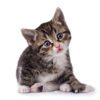

1/1 [==============================] - 0s 24ms/step
Model 1 with binary_crossentropy loss function predicts: 0.01073342002928257 so its a dog
1/1 [==============================] - 0s 27ms/step
Model 2 with Poisson loss function predicts: 0.012795234099030495 so its a dog






In [77]:
predict_test_images([
test_dog_file,
test_hotdog_file,
test_cat1_file,
test_cat2_file,
test_cat3_file,
test_cat4_file,
])